In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load cleaned dataset with target column
df = pd.read_csv(r"C:\My stuff\Coding\ML project\KiranveerSingh_projectfinal\Dataset\cleaned_nifty5_labeled.csv")

# Convert Date to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])


In [19]:
# Basic info and first look
print("Data Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3090 non-null   datetime64[ns]
 1   Symbol              3090 non-null   object        
 2   Series              3090 non-null   object        
 3   Prev Close          3090 non-null   float64       
 4   Open                3090 non-null   float64       
 5   High                3090 non-null   float64       
 6   Low                 3090 non-null   float64       
 7   Last                3090 non-null   float64       
 8   Close               3090 non-null   float64       
 9   VWAP                3090 non-null   float64       
 10  Volume              3090 non-null   float64       
 11  Turnover            3090 non-null   float64       
 12  Trades              3090 non-null   float64       
 13  Deliverable Volume  3090 non-null   f

In [20]:
# Summary statistics of numerical columns
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
                                Date    Prev Close          Open  \
count                           3090   3090.000000   3090.000000   
mean   2018-02-28 17:26:12.815534080   2015.525000   2018.618236   
min              2015-01-01 00:00:00    186.850000    187.950000   
25%              2016-08-01 00:00:00    503.112500    504.500000   
50%              2018-03-04 12:00:00   1182.300000   1185.500000   
75%              2019-10-01 00:00:00   2807.162500   2808.300000   
max              2021-12-04 00:00:00  10395.600000  10250.000000   
std                              NaN   2096.165597   2099.817064   

               High           Low          Last         Close          VWAP  \
count   3090.000000   3090.000000   3090.000000   3090.000000   3090.000000   
mean    2046.104450   1991.039563   2018.171003   2018.247460   2019.135951   
min      190.700000    169.150000    176.800000    178.050000    179.130000   
25%      509.800000    498.587500    503.100000   

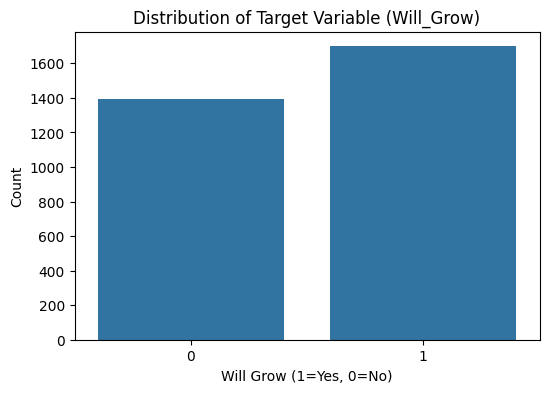

In [21]:
# Distribution of target column (Will_Grow)
plt.figure(figsize=(6,4))
sns.countplot(x='Will_Grow', data=df)
plt.title('Distribution of Target Variable (Will_Grow)')
plt.xlabel('Will Grow (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

In [22]:
# List all companies
print("Available companies:", df['Symbol'].unique())


Available companies: ['ADANIPORTS' 'ASIANPAINT' 'AXISBANK' 'BAJAJAUTO' 'BAJAJFINSERV']


ANALYZING FOR 1ST COMPANY- ADANIPORTS


In [23]:

# Choose the company you want
sample_company = "ADANIPORTS"

df_company = df[df['Symbol'] == sample_company]


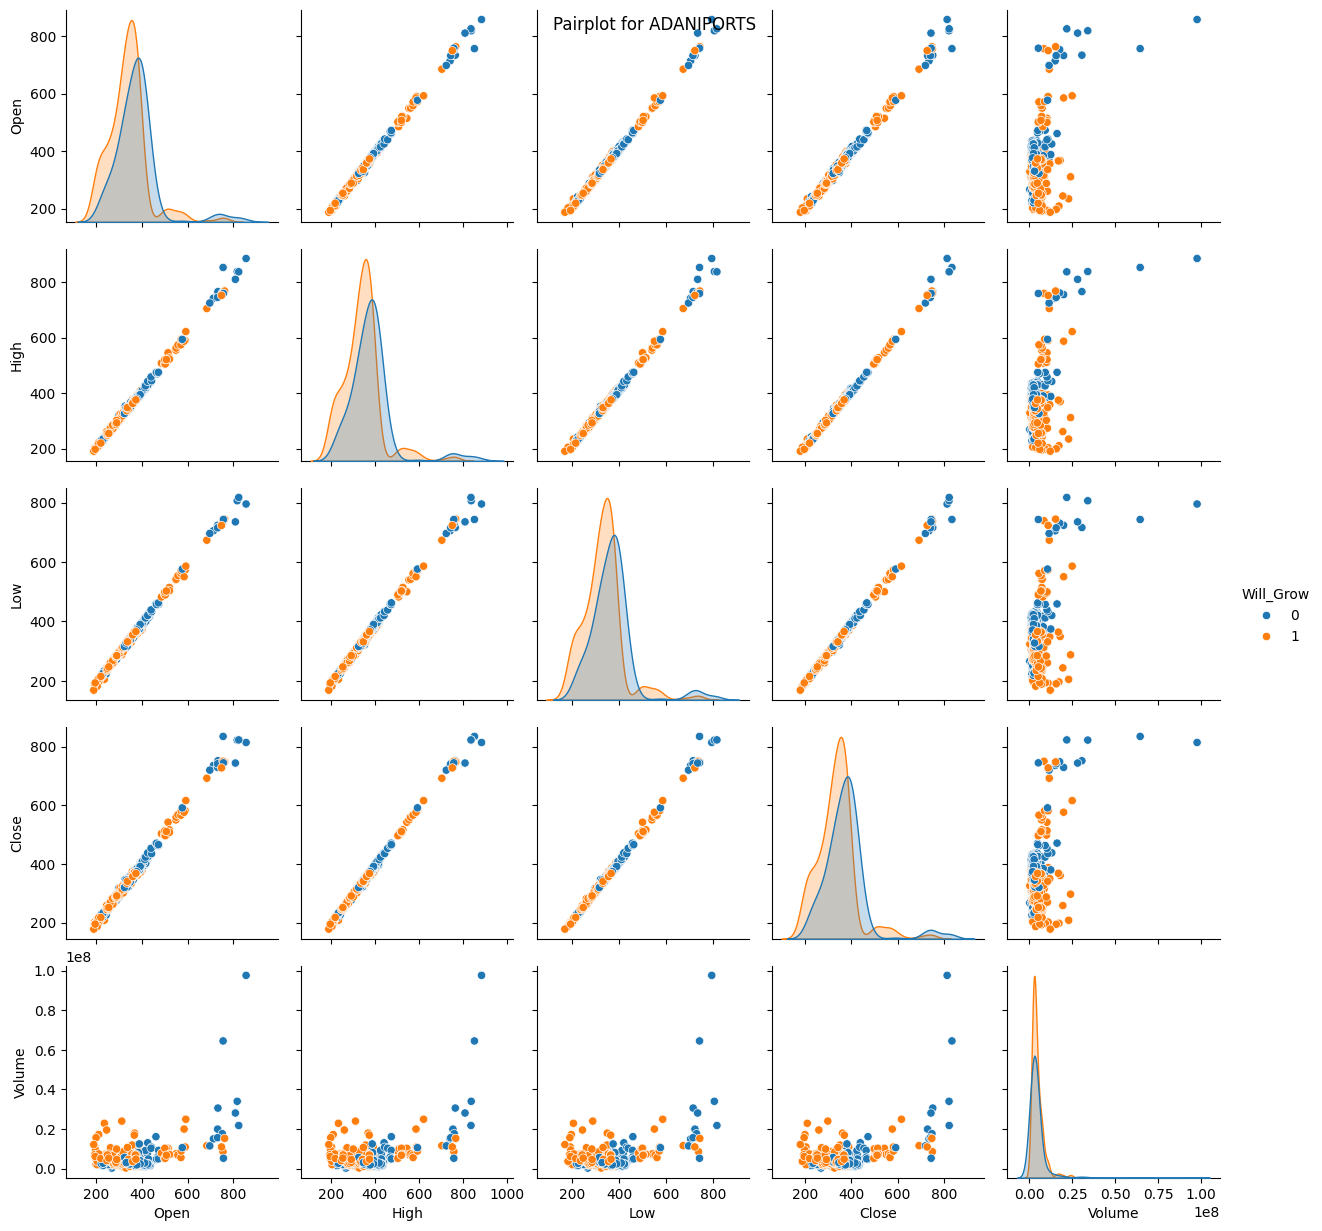

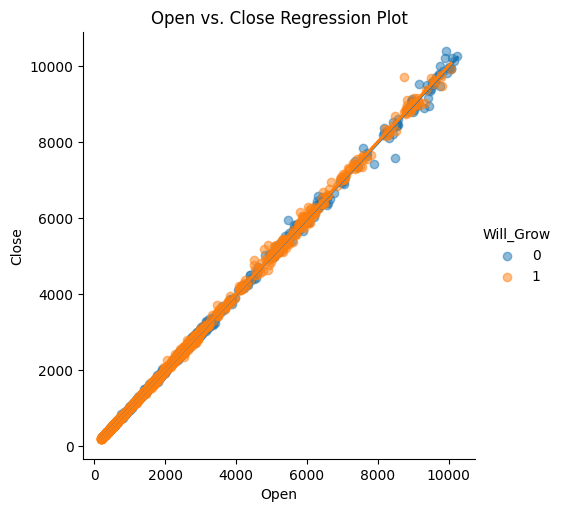

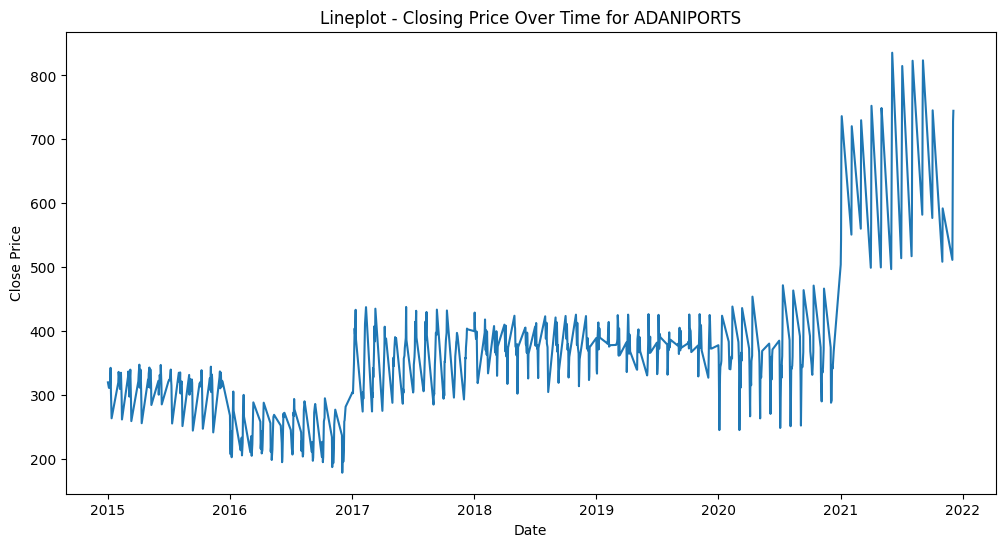

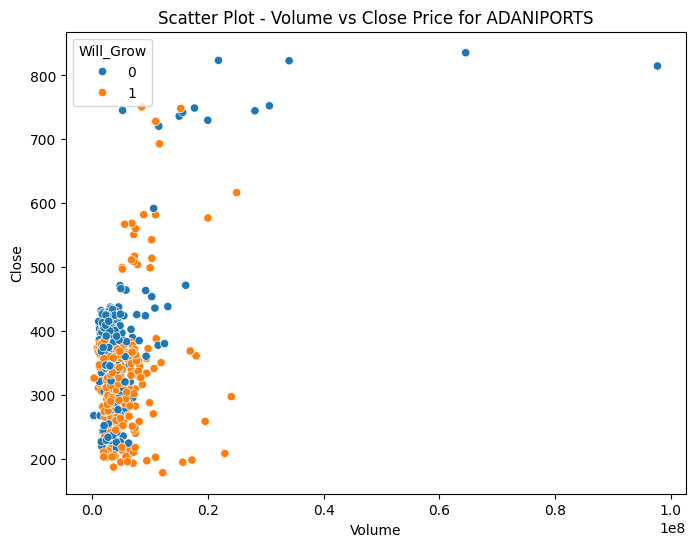

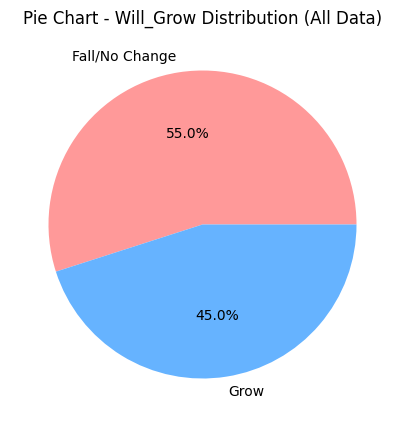

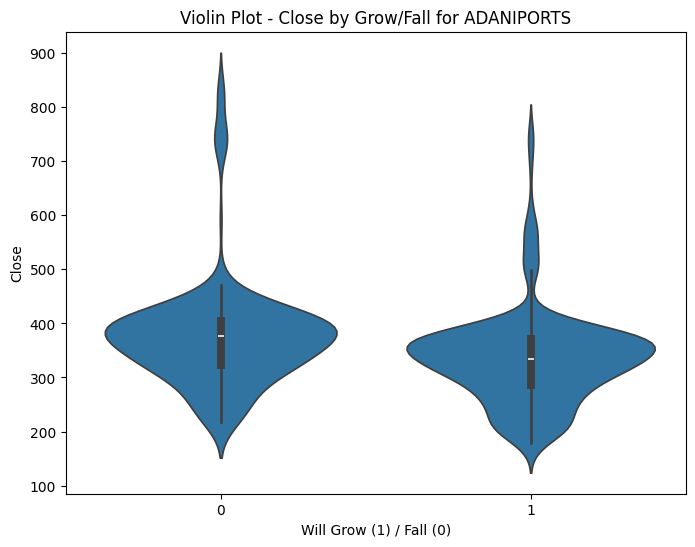

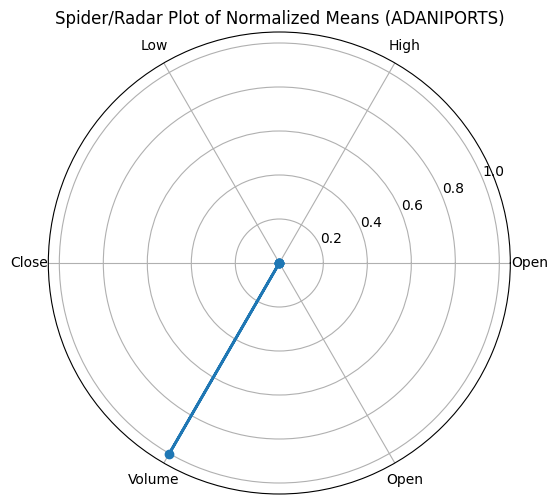

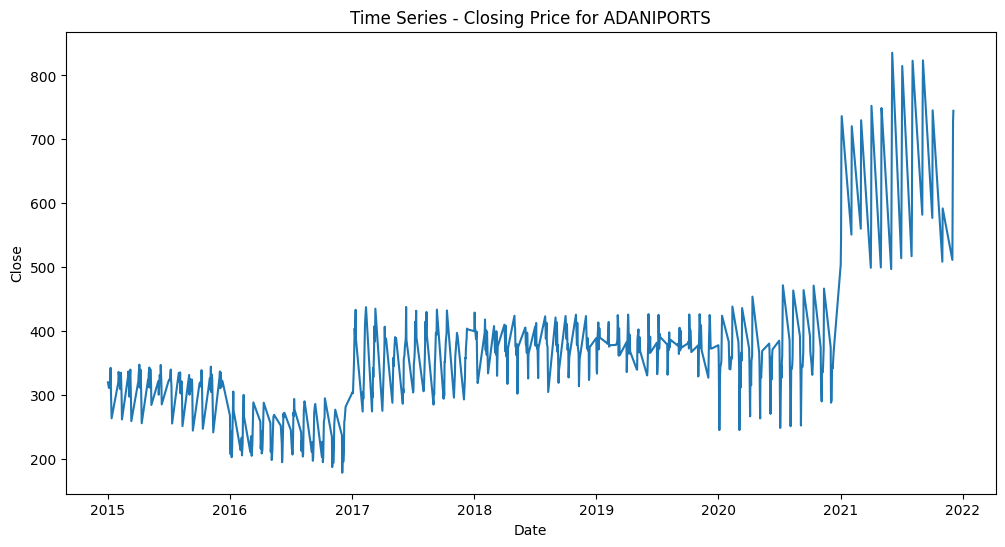

C:\Users\mrran\AppData\Local\Temp\ipykernel_12556\3068685456.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['Daily_Return'] = df_company['Close'].pct_change()
C:\Users\mrran\AppData\Local\Temp\ipykernel_12556\3068685456.py:68: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_company['Daily_Return'].dropna(), shade=True)


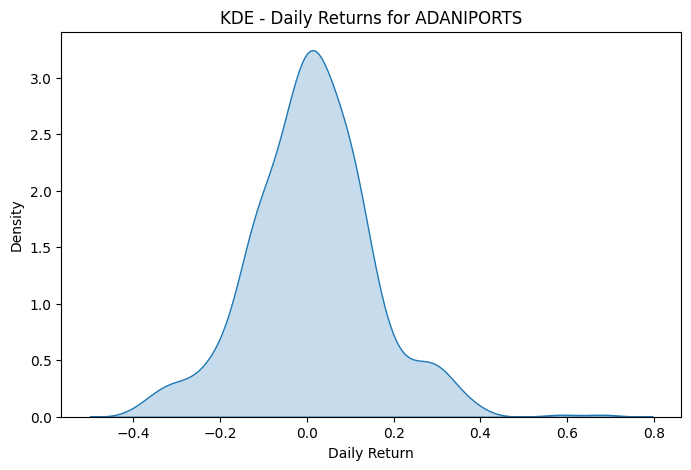

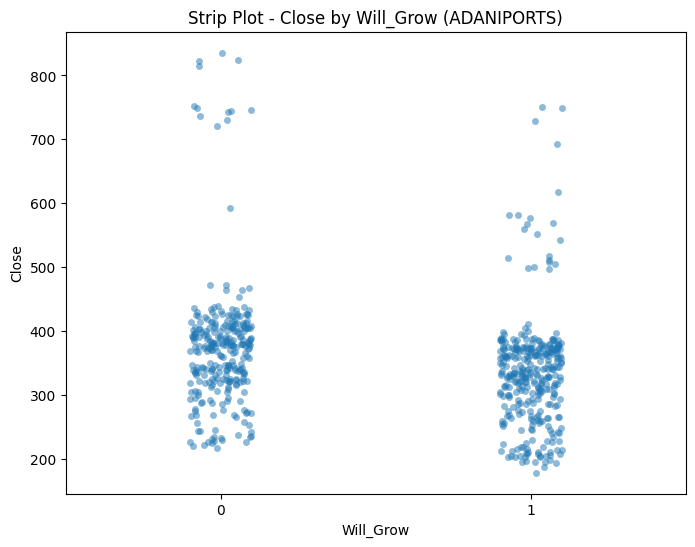

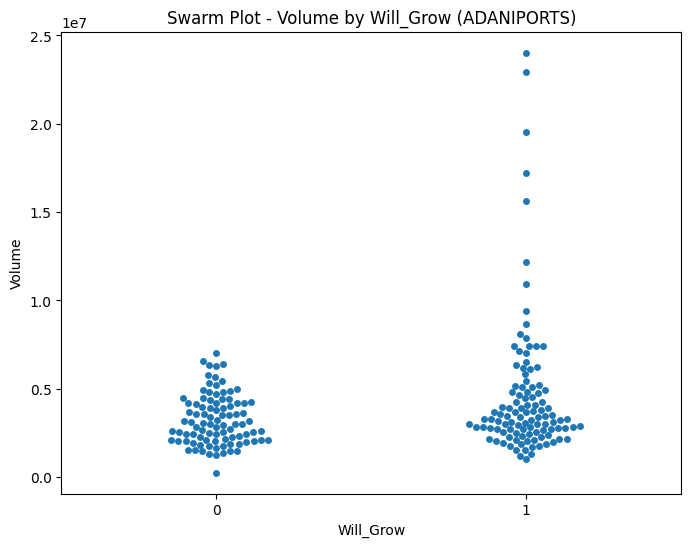

In [24]:
# Pairplot (feature relationships)
sns.pairplot(
    df_company[['Open', 'High', 'Low', 'Close', 'Volume', 'Will_Grow']],
    hue="Will_Grow", diag_kind="kde"
)
plt.suptitle(f"Pairplot for {sample_company}")
plt.show()

# Regression plot (Open vs. Close)
sns.lmplot(data=df, x="Open", y="Close", hue="Will_Grow", scatter_kws={'alpha':0.5})
plt.title("Open vs. Close Regression Plot")
plt.show()

# Line Plot (Closing price over time)
plt.figure(figsize=(12,6))
plt.plot(df_company['Date'], df_company['Close'])
plt.title(f"Lineplot - Closing Price Over Time for {sample_company}")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Scatter Plot (Volume vs Close)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_company, x='Volume', y='Close', hue='Will_Grow')
plt.title(f"Scatter Plot - Volume vs Close Price for {sample_company}")
plt.show()

# Pie Chart (Distribution of Will_Grow)
grow_counts = df['Will_Grow'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(grow_counts, labels=['Fall/No Change', 'Grow'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Pie Chart - Will_Grow Distribution (All Data)")
plt.show()

# Violin Plot (Closing Prices by Target)
plt.figure(figsize=(8,6))
sns.violinplot(x='Will_Grow', y='Close', data=df_company)
plt.title(f"Violin Plot - Close by Grow/Fall for {sample_company}")
plt.xlabel('Will Grow (1) / Fall (0)')
plt.show()

# Spider Plot (Radar chart of means for normalized features)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
mean_values = df_company[features].mean()
values = mean_values / mean_values.max()
labels = list(features)
values = np.append(values.values, values.values[0])  # to close the circle
labels += [labels[0]]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(np.degrees(angles), labels)
plt.title(f"Spider/Radar Plot of Normalized Means ({sample_company})")
plt.show()

# Time Series Plot (Daily Closing Price)
plt.figure(figsize=(12,6))
sns.lineplot(data=df_company, x='Date', y='Close')
plt.title(f"Time Series - Closing Price for {sample_company}")
plt.show()

# KDE Plot (Kernel density of Daily Returns)
df_company['Daily_Return'] = df_company['Close'].pct_change()
plt.figure(figsize=(8,5))
sns.kdeplot(df_company['Daily_Return'].dropna(), shade=True)
plt.title(f"KDE - Daily Returns for {sample_company}")
plt.xlabel('Daily Return')
plt.show()

# 10. Strip Plot (Close price vs Will_Grow)
plt.figure(figsize=(8,6))
sns.stripplot(x='Will_Grow', y='Close', data=df_company, jitter=True, alpha=0.5)
plt.title(f"Strip Plot - Close by Will_Grow ({sample_company})")
plt.show()

# 11. Swarm Plot (Volume vs Will_Grow)
plt.figure(figsize=(8,6))
sns.swarmplot(x='Will_Grow', y='Volume', data=df_company[:200])  # Swarm plot gets slow on big data
plt.title(f"Swarm Plot - Volume by Will_Grow ({sample_company})")
plt.show()



ANALYZING FOR 2ND COMPANY- ASIANPAINT

In [25]:

# Choose the company you want
sample_company = "ASIANPAINT"

df_company = df[df['Symbol'] == sample_company]


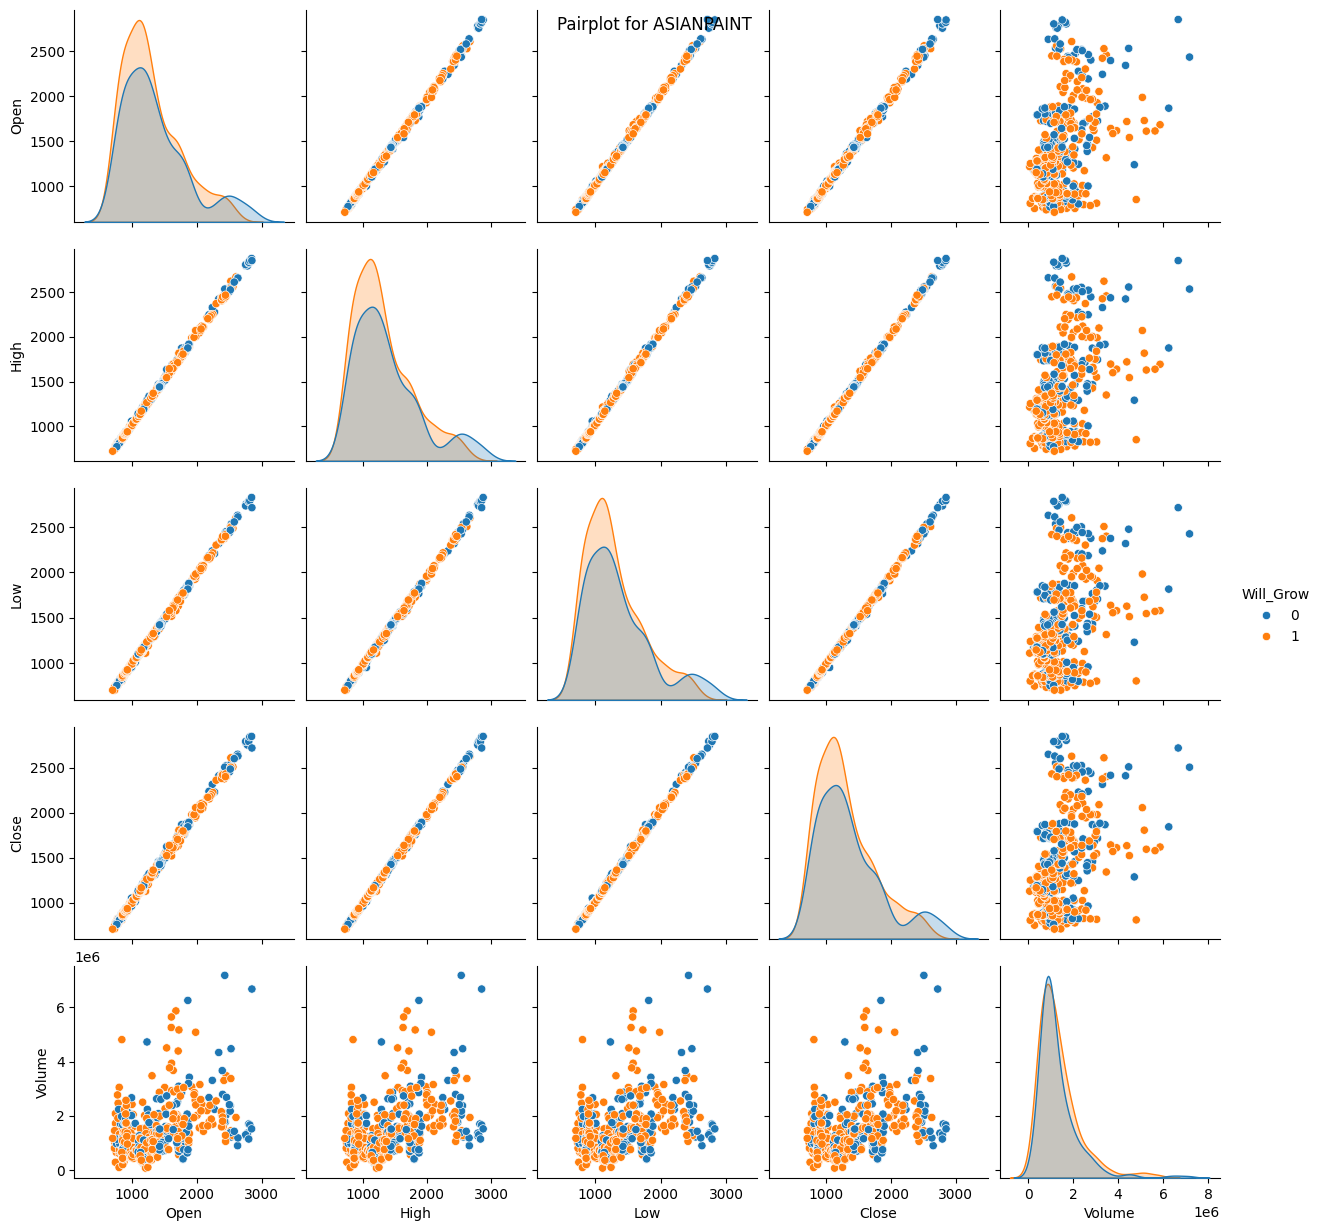

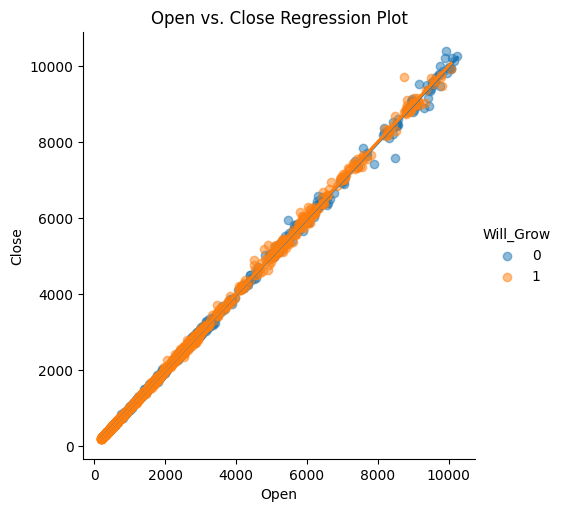

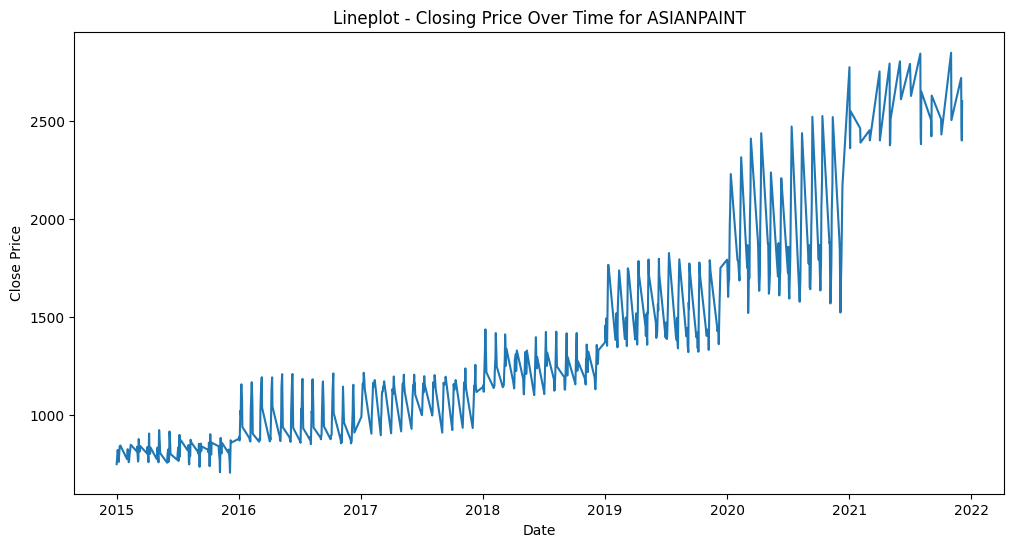

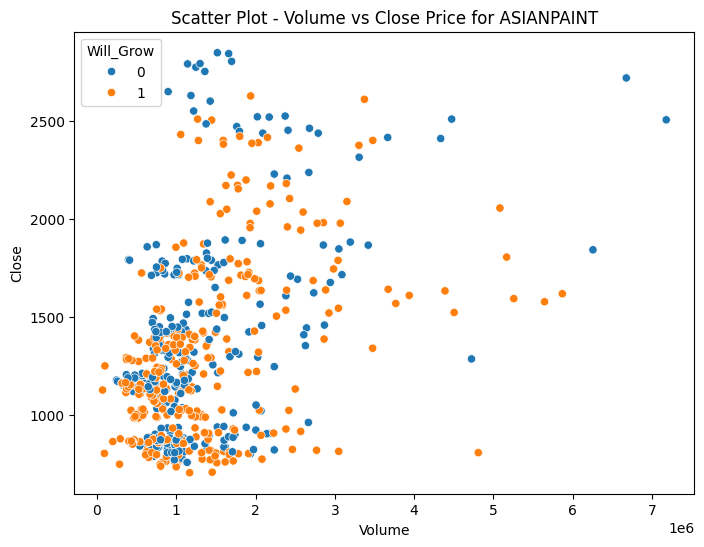

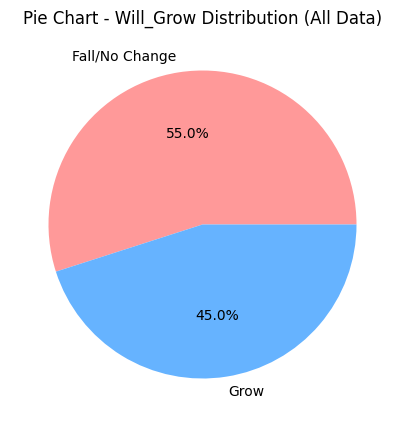

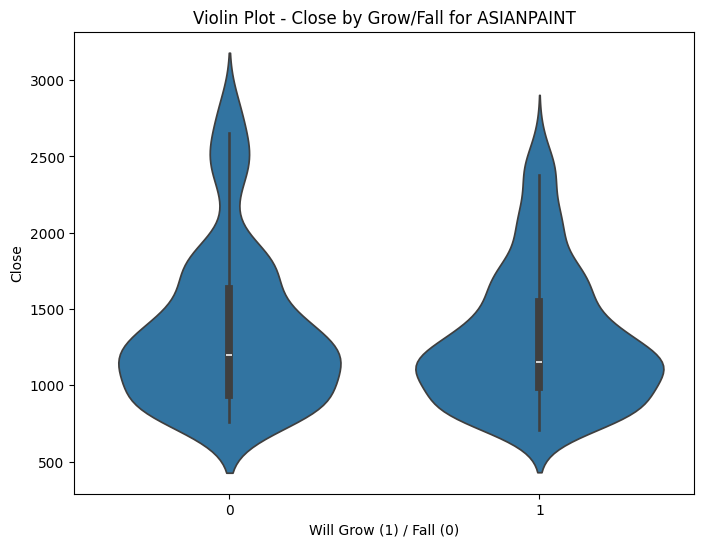

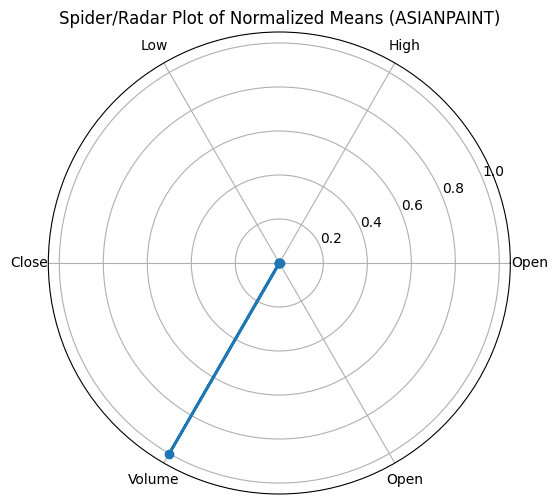

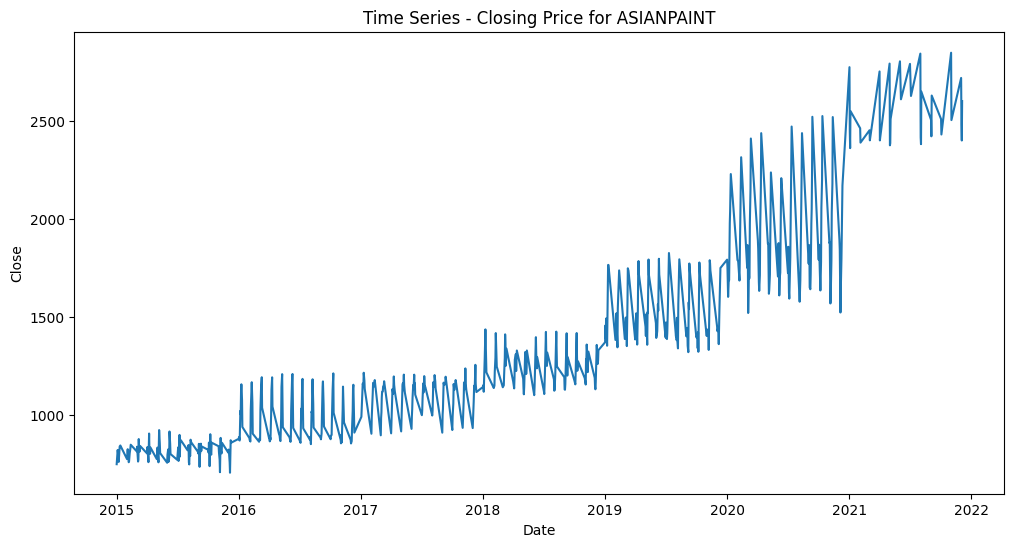

C:\Users\mrran\AppData\Local\Temp\ipykernel_12556\3068685456.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['Daily_Return'] = df_company['Close'].pct_change()
C:\Users\mrran\AppData\Local\Temp\ipykernel_12556\3068685456.py:68: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_company['Daily_Return'].dropna(), shade=True)


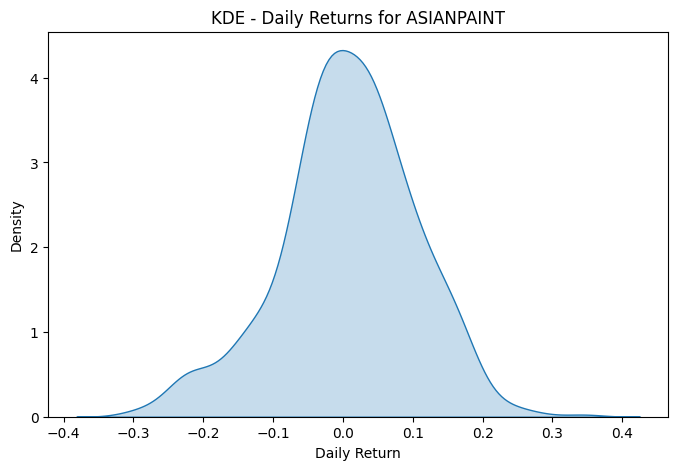

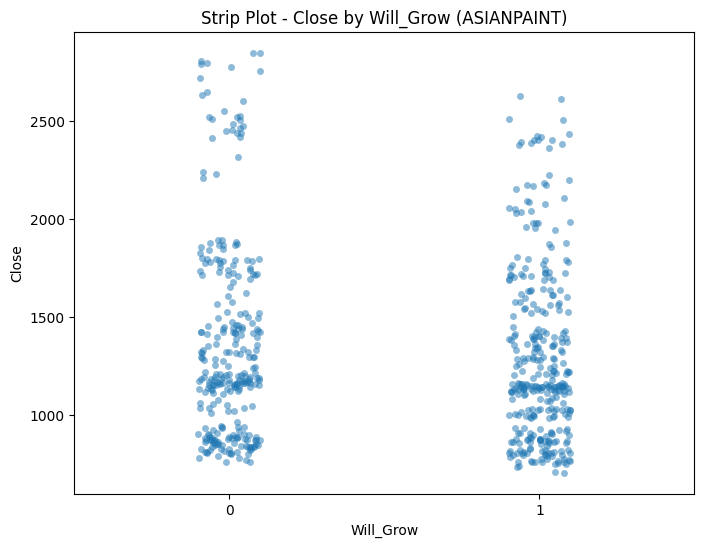

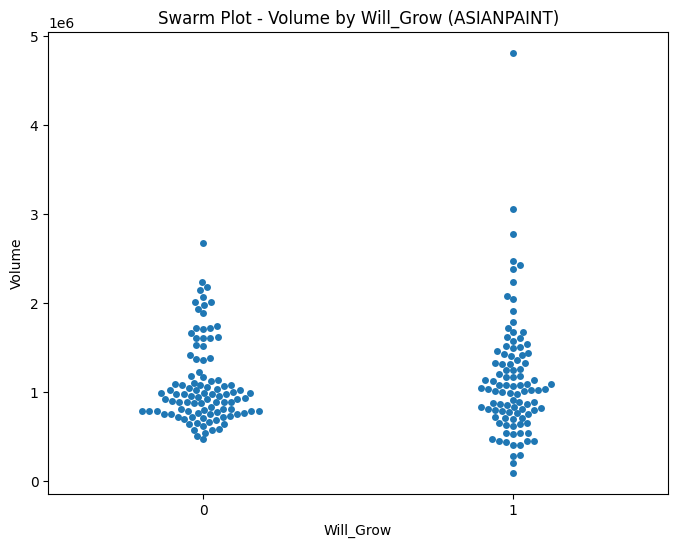

In [26]:
# Pairplot (feature relationships)
sns.pairplot(
    df_company[['Open', 'High', 'Low', 'Close', 'Volume', 'Will_Grow']],
    hue="Will_Grow", diag_kind="kde"
)
plt.suptitle(f"Pairplot for {sample_company}")
plt.show()

# Regression plot (Open vs. Close)
sns.lmplot(data=df, x="Open", y="Close", hue="Will_Grow", scatter_kws={'alpha':0.5})
plt.title("Open vs. Close Regression Plot")
plt.show()

# Line Plot (Closing price over time)
plt.figure(figsize=(12,6))
plt.plot(df_company['Date'], df_company['Close'])
plt.title(f"Lineplot - Closing Price Over Time for {sample_company}")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Scatter Plot (Volume vs Close)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_company, x='Volume', y='Close', hue='Will_Grow')
plt.title(f"Scatter Plot - Volume vs Close Price for {sample_company}")
plt.show()

# Pie Chart (Distribution of Will_Grow)
grow_counts = df['Will_Grow'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(grow_counts, labels=['Fall/No Change', 'Grow'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Pie Chart - Will_Grow Distribution (All Data)")
plt.show()

# Violin Plot (Closing Prices by Target)
plt.figure(figsize=(8,6))
sns.violinplot(x='Will_Grow', y='Close', data=df_company)
plt.title(f"Violin Plot - Close by Grow/Fall for {sample_company}")
plt.xlabel('Will Grow (1) / Fall (0)')
plt.show()

# Spider Plot (Radar chart of means for normalized features)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
mean_values = df_company[features].mean()
values = mean_values / mean_values.max()
labels = list(features)
values = np.append(values.values, values.values[0])  # to close the circle
labels += [labels[0]]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(np.degrees(angles), labels)
plt.title(f"Spider/Radar Plot of Normalized Means ({sample_company})")
plt.show()

# Time Series Plot (Daily Closing Price)
plt.figure(figsize=(12,6))
sns.lineplot(data=df_company, x='Date', y='Close')
plt.title(f"Time Series - Closing Price for {sample_company}")
plt.show()

# KDE Plot (Kernel density of Daily Returns)
df_company['Daily_Return'] = df_company['Close'].pct_change()
plt.figure(figsize=(8,5))
sns.kdeplot(df_company['Daily_Return'].dropna(), shade=True)
plt.title(f"KDE - Daily Returns for {sample_company}")
plt.xlabel('Daily Return')
plt.show()

# 10. Strip Plot (Close price vs Will_Grow)
plt.figure(figsize=(8,6))
sns.stripplot(x='Will_Grow', y='Close', data=df_company, jitter=True, alpha=0.5)
plt.title(f"Strip Plot - Close by Will_Grow ({sample_company})")
plt.show()

# 11. Swarm Plot (Volume vs Will_Grow)
plt.figure(figsize=(8,6))
sns.swarmplot(x='Will_Grow', y='Volume', data=df_company[:200])  # Swarm plot gets slow on big data
plt.title(f"Swarm Plot - Volume by Will_Grow ({sample_company})")
plt.show()



ANALYZING FOR 3RD COMPANY- AXISBANK

In [27]:

# Choose the company you want
sample_company = "AXISBANK"

df_company = df[df['Symbol'] == sample_company]


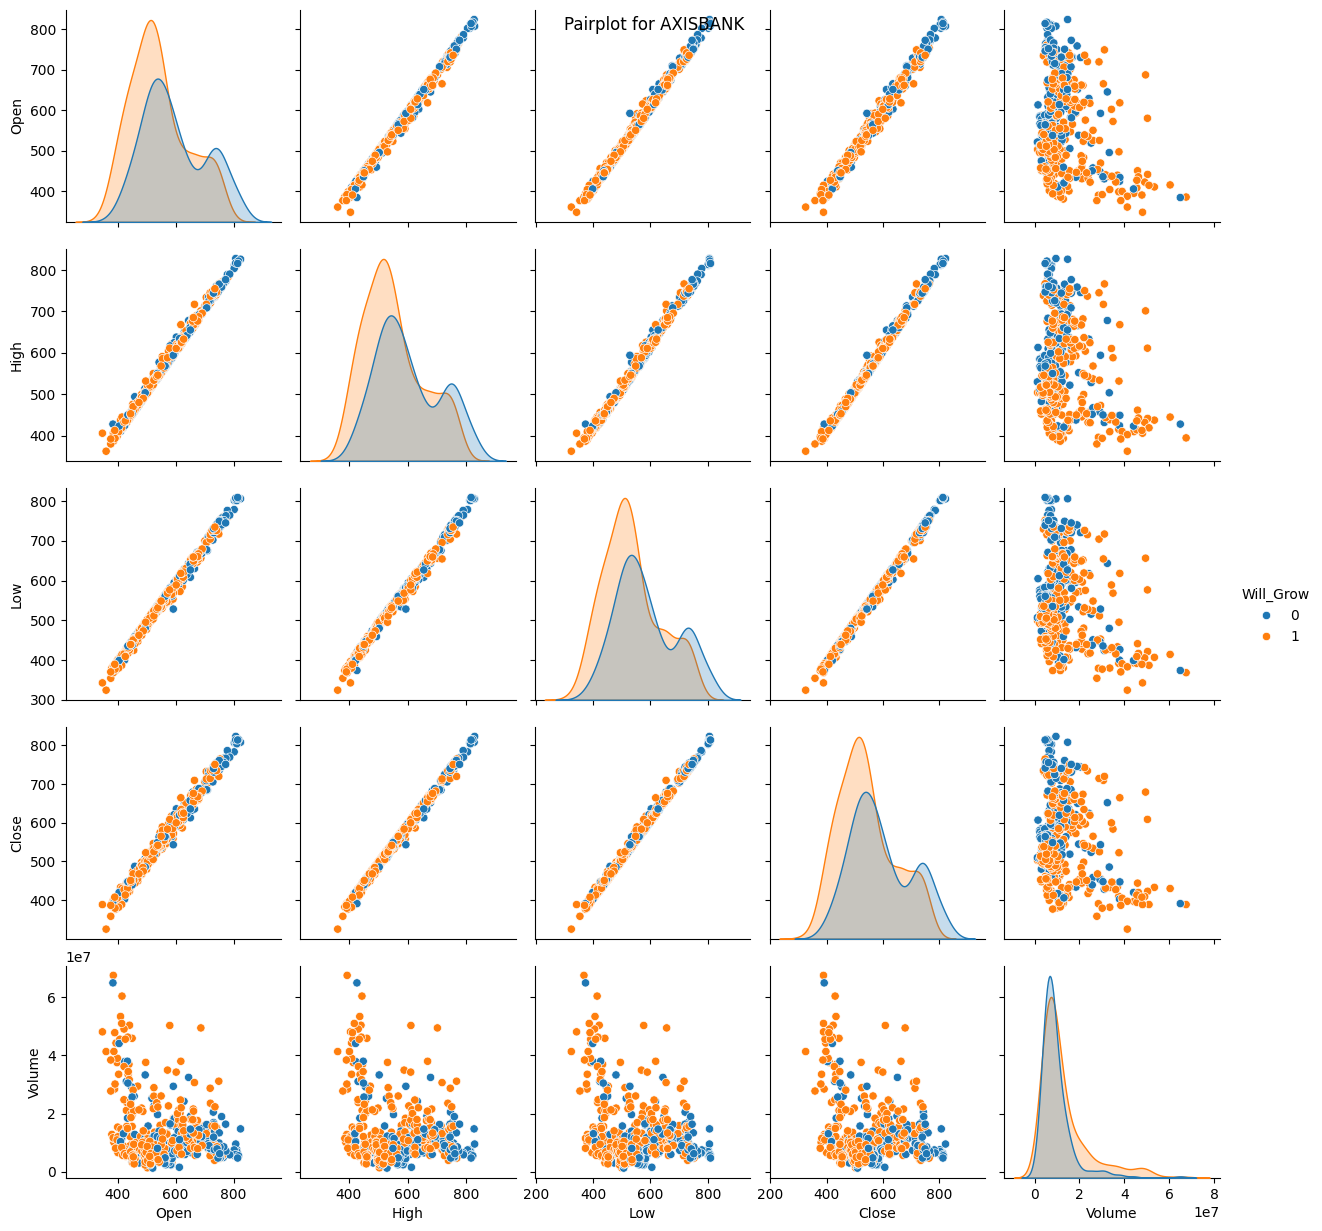

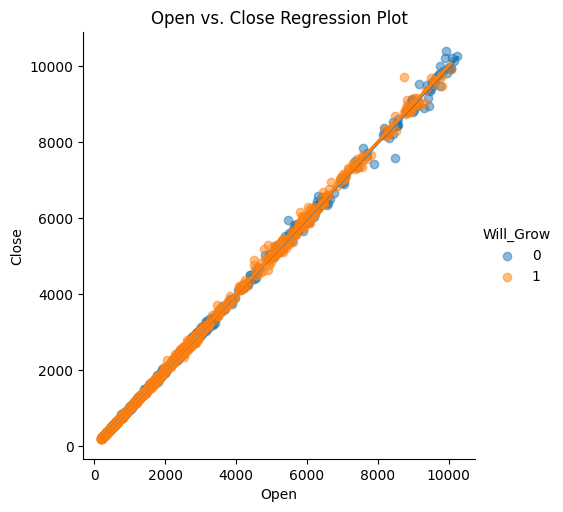

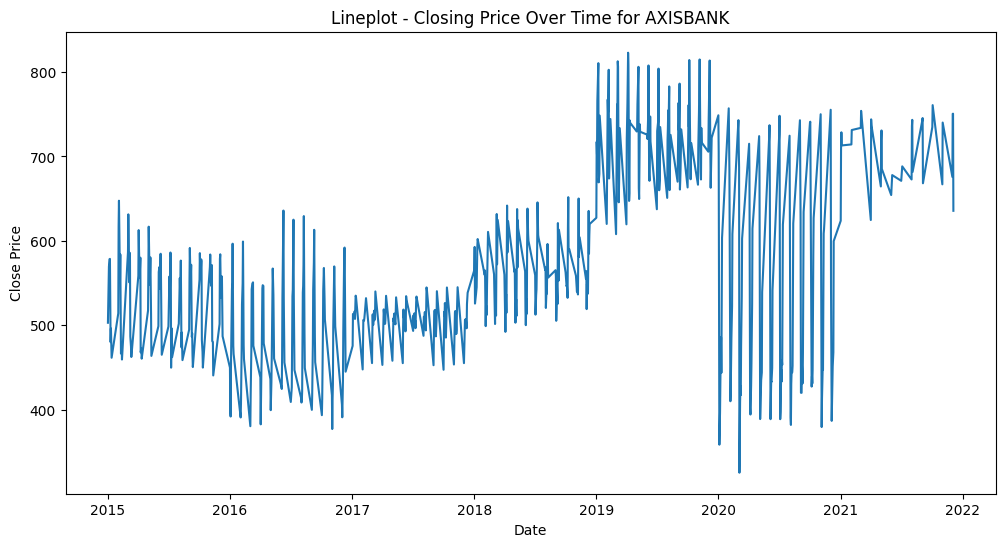

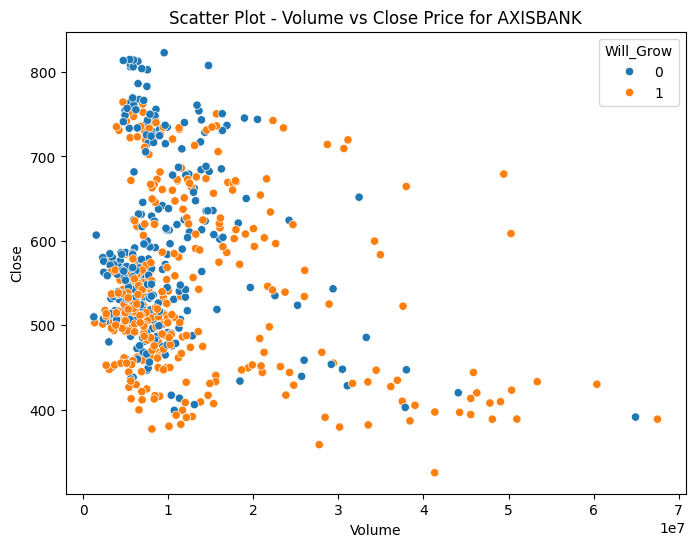

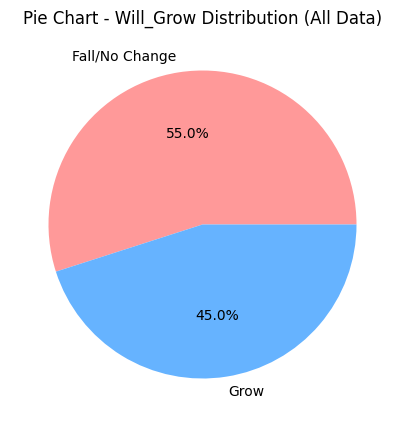

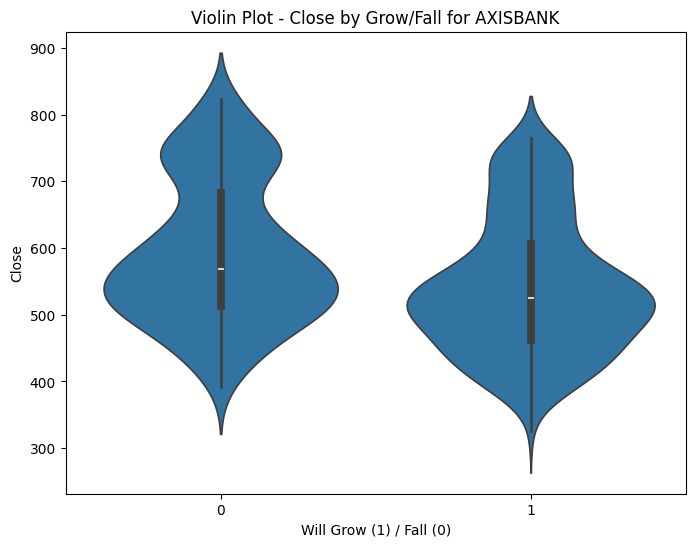

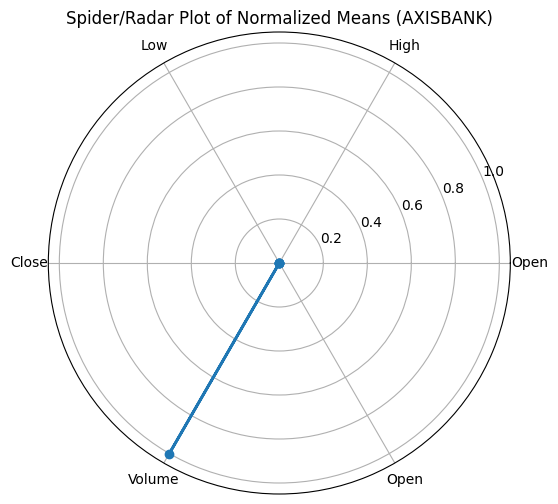

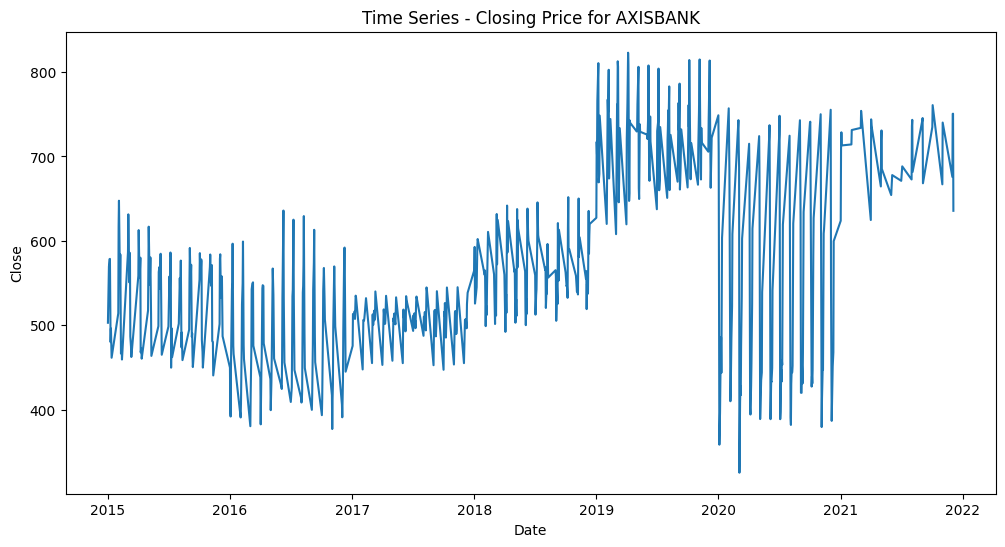

C:\Users\mrran\AppData\Local\Temp\ipykernel_12556\3068685456.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['Daily_Return'] = df_company['Close'].pct_change()
C:\Users\mrran\AppData\Local\Temp\ipykernel_12556\3068685456.py:68: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_company['Daily_Return'].dropna(), shade=True)


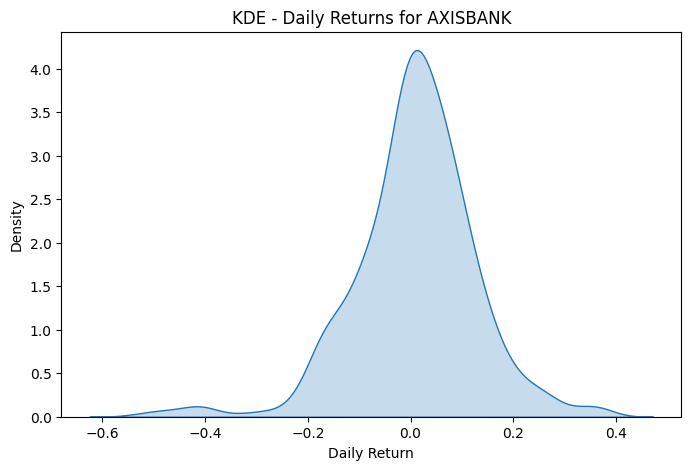

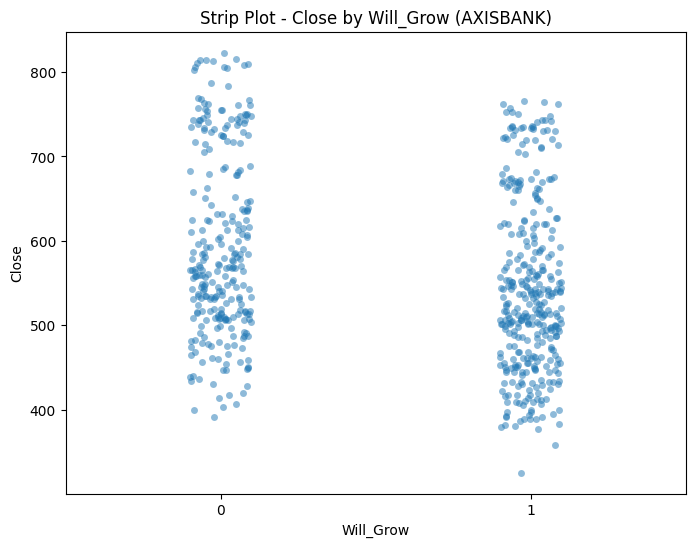

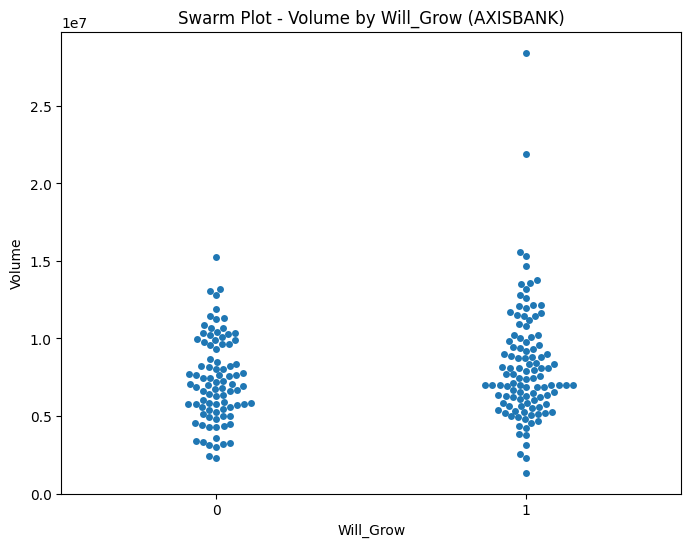

In [28]:
# Pairplot (feature relationships)
sns.pairplot(
    df_company[['Open', 'High', 'Low', 'Close', 'Volume', 'Will_Grow']],
    hue="Will_Grow", diag_kind="kde"
)
plt.suptitle(f"Pairplot for {sample_company}")
plt.show()

# Regression plot (Open vs. Close)
sns.lmplot(data=df, x="Open", y="Close", hue="Will_Grow", scatter_kws={'alpha':0.5})
plt.title("Open vs. Close Regression Plot")
plt.show()

# Line Plot (Closing price over time)
plt.figure(figsize=(12,6))
plt.plot(df_company['Date'], df_company['Close'])
plt.title(f"Lineplot - Closing Price Over Time for {sample_company}")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Scatter Plot (Volume vs Close)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_company, x='Volume', y='Close', hue='Will_Grow')
plt.title(f"Scatter Plot - Volume vs Close Price for {sample_company}")
plt.show()

# Pie Chart (Distribution of Will_Grow)
grow_counts = df['Will_Grow'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(grow_counts, labels=['Fall/No Change', 'Grow'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Pie Chart - Will_Grow Distribution (All Data)")
plt.show()

# Violin Plot (Closing Prices by Target)
plt.figure(figsize=(8,6))
sns.violinplot(x='Will_Grow', y='Close', data=df_company)
plt.title(f"Violin Plot - Close by Grow/Fall for {sample_company}")
plt.xlabel('Will Grow (1) / Fall (0)')
plt.show()

# Spider Plot (Radar chart of means for normalized features)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
mean_values = df_company[features].mean()
values = mean_values / mean_values.max()
labels = list(features)
values = np.append(values.values, values.values[0])  # to close the circle
labels += [labels[0]]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(np.degrees(angles), labels)
plt.title(f"Spider/Radar Plot of Normalized Means ({sample_company})")
plt.show()

# Time Series Plot (Daily Closing Price)
plt.figure(figsize=(12,6))
sns.lineplot(data=df_company, x='Date', y='Close')
plt.title(f"Time Series - Closing Price for {sample_company}")
plt.show()

# KDE Plot (Kernel density of Daily Returns)
df_company['Daily_Return'] = df_company['Close'].pct_change()
plt.figure(figsize=(8,5))
sns.kdeplot(df_company['Daily_Return'].dropna(), shade=True)
plt.title(f"KDE - Daily Returns for {sample_company}")
plt.xlabel('Daily Return')
plt.show()

# 10. Strip Plot (Close price vs Will_Grow)
plt.figure(figsize=(8,6))
sns.stripplot(x='Will_Grow', y='Close', data=df_company, jitter=True, alpha=0.5)
plt.title(f"Strip Plot - Close by Will_Grow ({sample_company})")
plt.show()

# 11. Swarm Plot (Volume vs Will_Grow)
plt.figure(figsize=(8,6))
sns.swarmplot(x='Will_Grow', y='Volume', data=df_company[:200])  # Swarm plot gets slow on big data
plt.title(f"Swarm Plot - Volume by Will_Grow ({sample_company})")
plt.show()



ANALYZING FOR 4TH COMPANY- BAJAJAUTO

In [29]:

# Choose the company you want
sample_company = "BAJAJAUTO"

df_company = df[df['Symbol'] == sample_company]


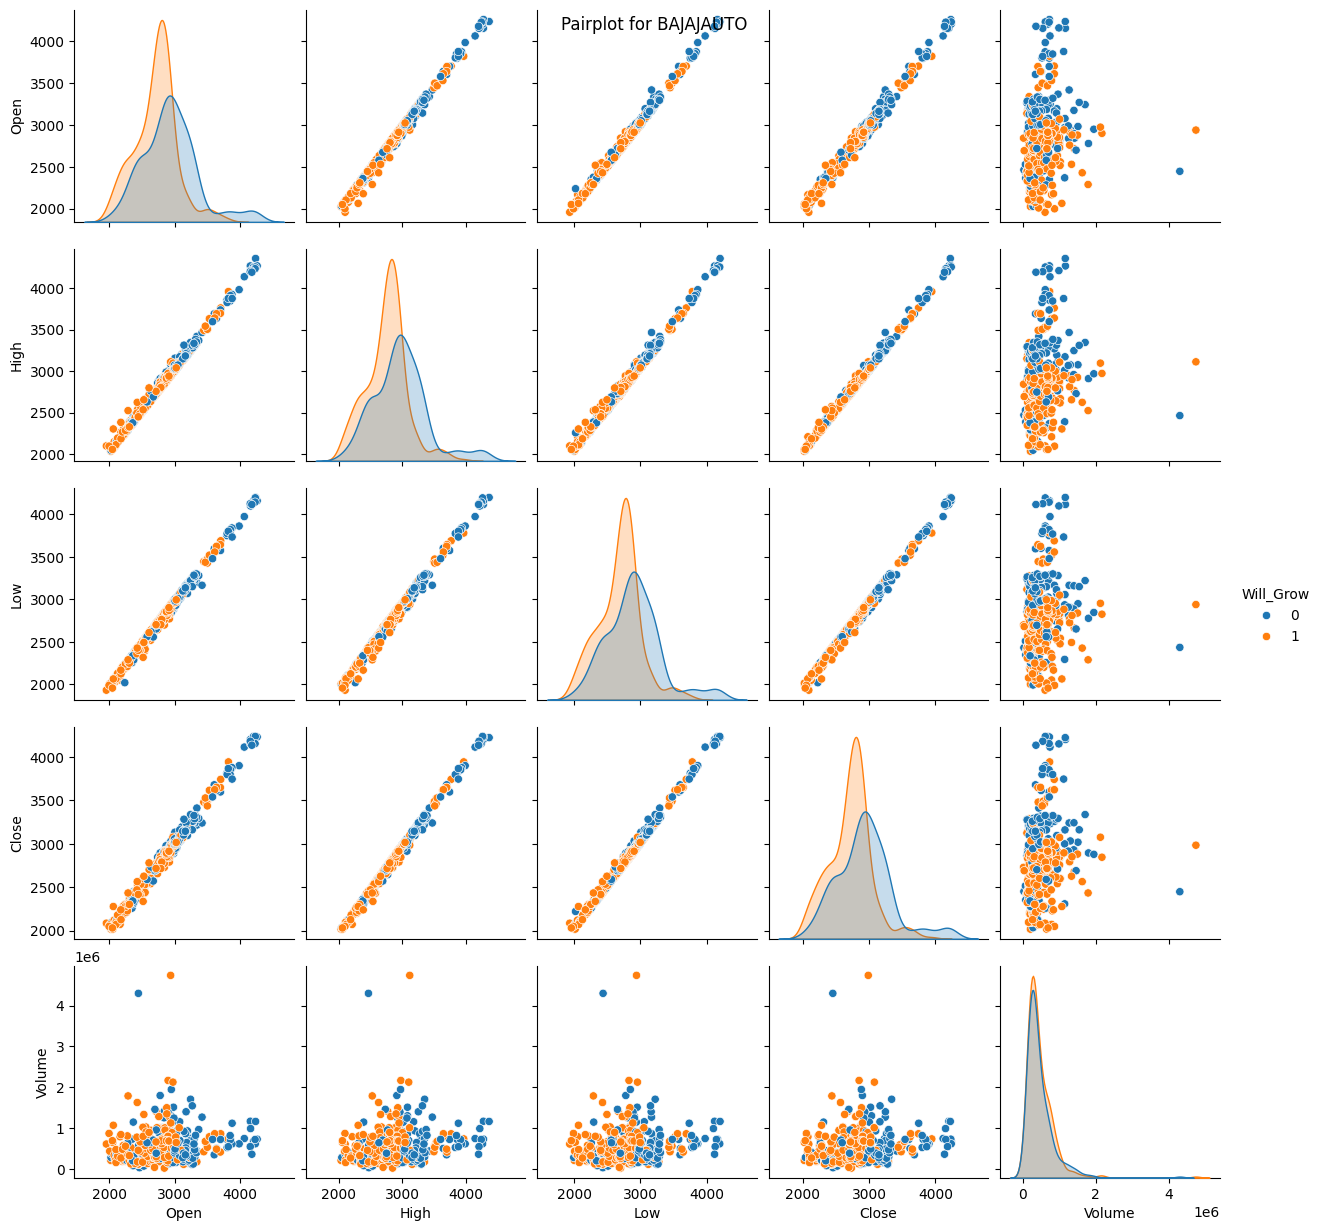

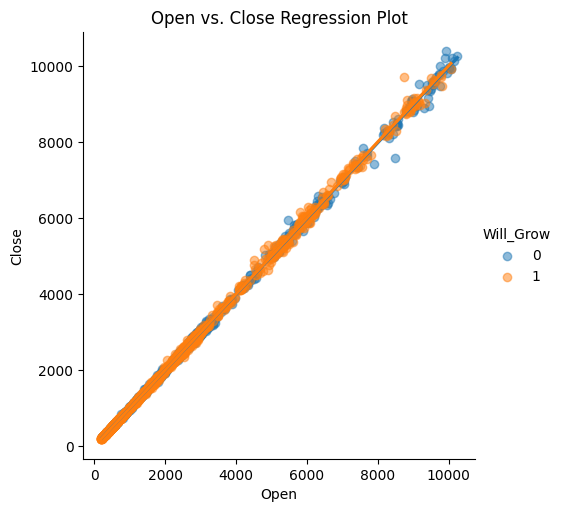

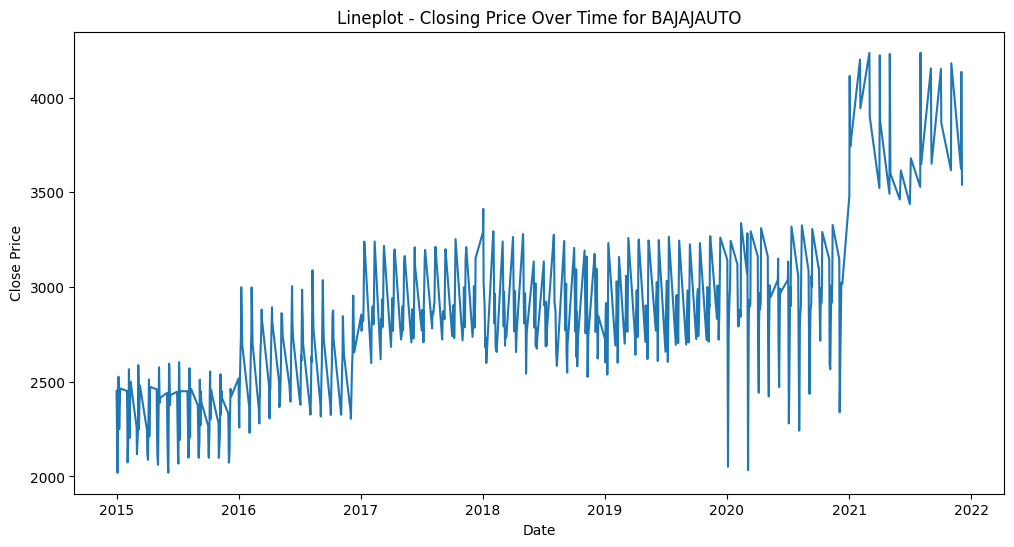

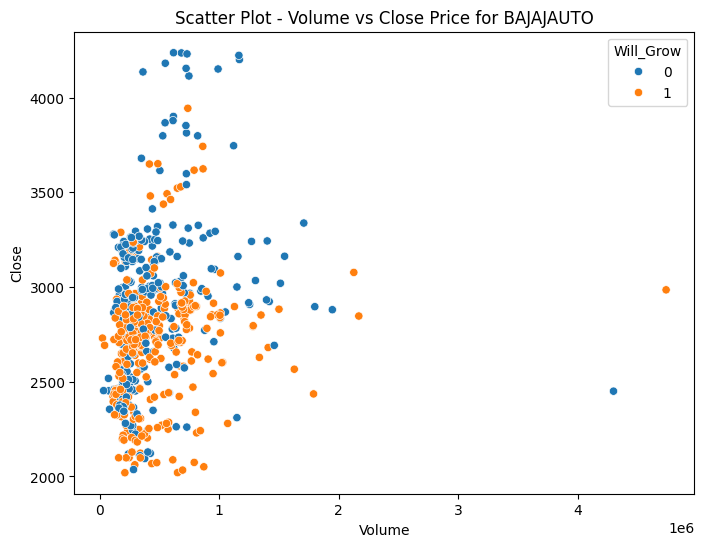

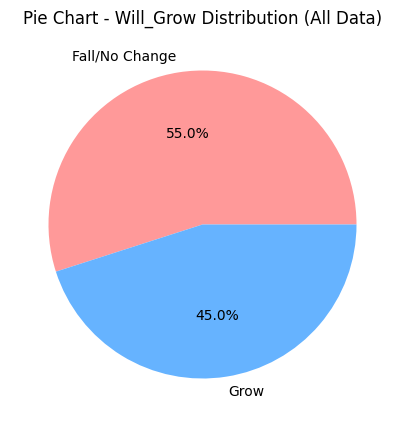

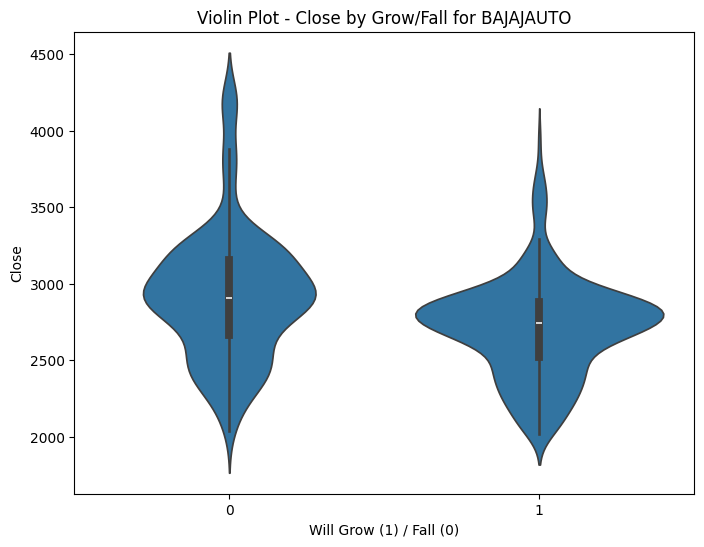

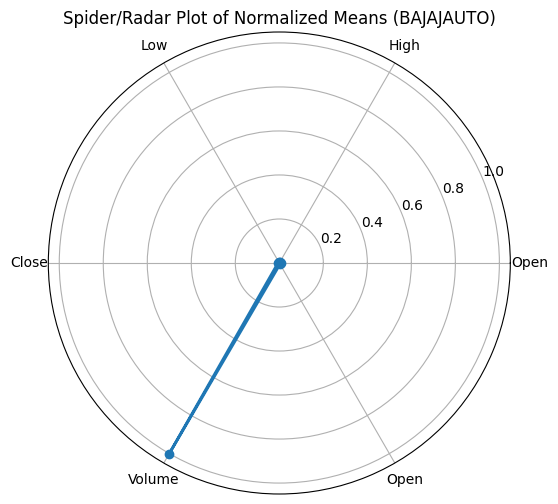

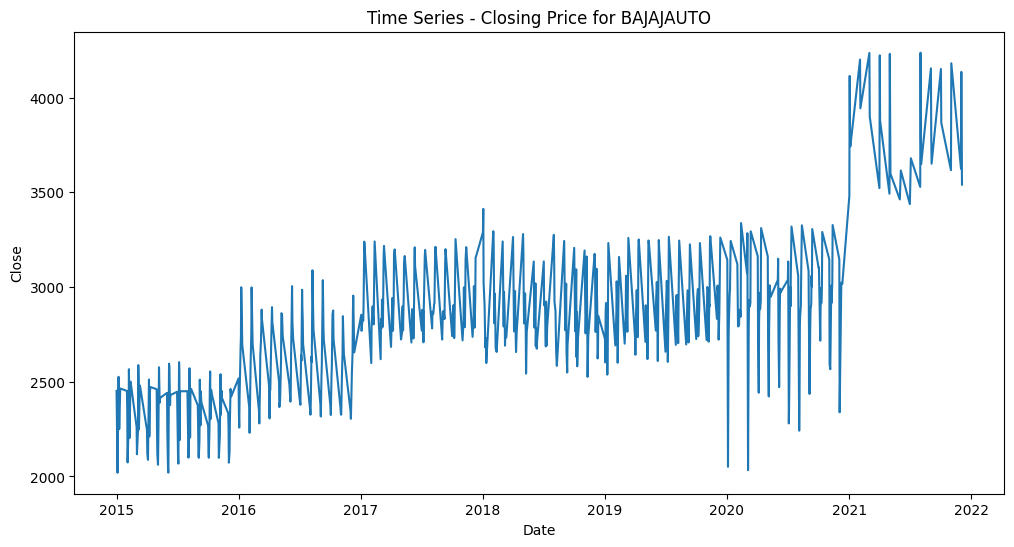

C:\Users\mrran\AppData\Local\Temp\ipykernel_12556\3068685456.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['Daily_Return'] = df_company['Close'].pct_change()
C:\Users\mrran\AppData\Local\Temp\ipykernel_12556\3068685456.py:68: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_company['Daily_Return'].dropna(), shade=True)


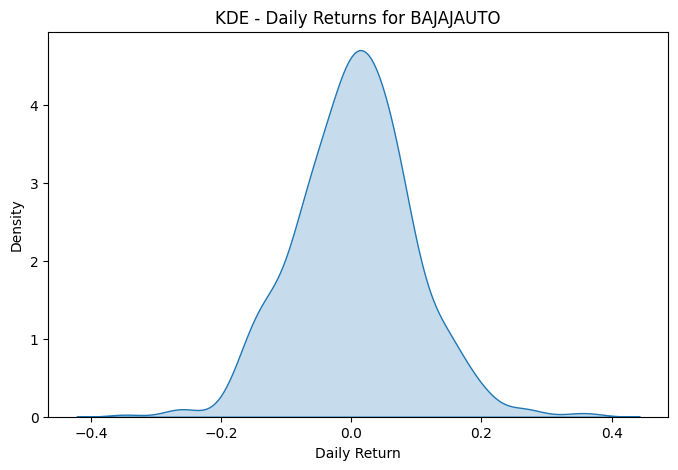

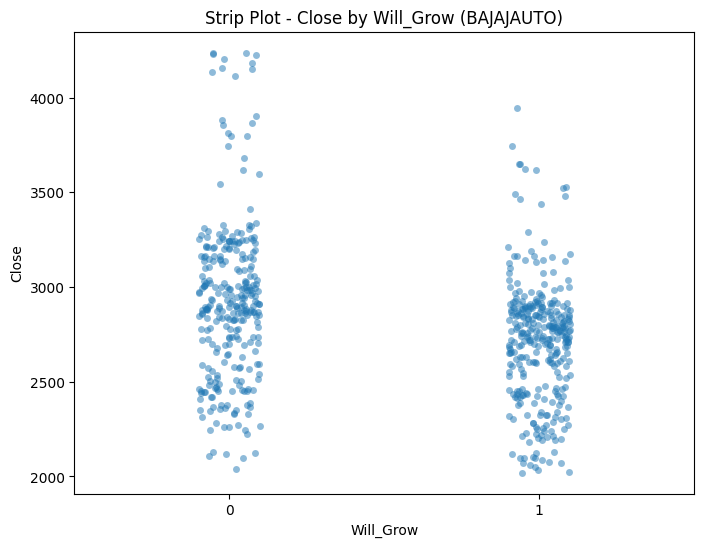

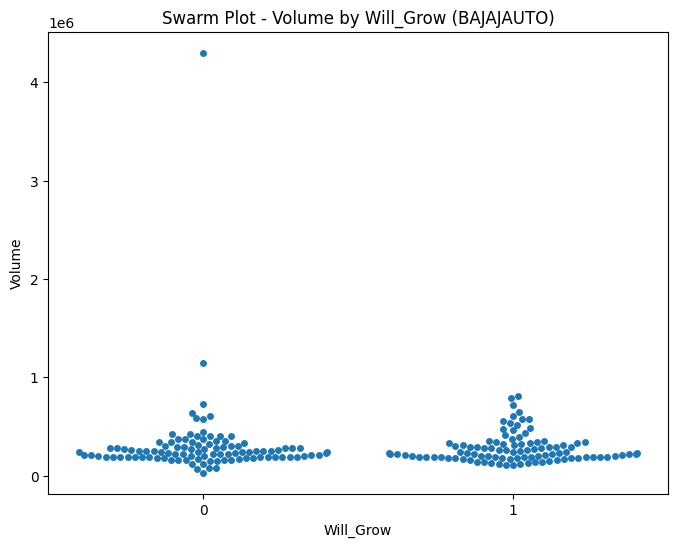

In [30]:
# Pairplot (feature relationships)
sns.pairplot(
    df_company[['Open', 'High', 'Low', 'Close', 'Volume', 'Will_Grow']],
    hue="Will_Grow", diag_kind="kde"
)
plt.suptitle(f"Pairplot for {sample_company}")
plt.show()

# Regression plot (Open vs. Close)
sns.lmplot(data=df, x="Open", y="Close", hue="Will_Grow", scatter_kws={'alpha':0.5})
plt.title("Open vs. Close Regression Plot")
plt.show()

# Line Plot (Closing price over time)
plt.figure(figsize=(12,6))
plt.plot(df_company['Date'], df_company['Close'])
plt.title(f"Lineplot - Closing Price Over Time for {sample_company}")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Scatter Plot (Volume vs Close)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_company, x='Volume', y='Close', hue='Will_Grow')
plt.title(f"Scatter Plot - Volume vs Close Price for {sample_company}")
plt.show()

# Pie Chart (Distribution of Will_Grow)
grow_counts = df['Will_Grow'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(grow_counts, labels=['Fall/No Change', 'Grow'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Pie Chart - Will_Grow Distribution (All Data)")
plt.show()

# Violin Plot (Closing Prices by Target)
plt.figure(figsize=(8,6))
sns.violinplot(x='Will_Grow', y='Close', data=df_company)
plt.title(f"Violin Plot - Close by Grow/Fall for {sample_company}")
plt.xlabel('Will Grow (1) / Fall (0)')
plt.show()

# Spider Plot (Radar chart of means for normalized features)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
mean_values = df_company[features].mean()
values = mean_values / mean_values.max()
labels = list(features)
values = np.append(values.values, values.values[0])  # to close the circle
labels += [labels[0]]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(np.degrees(angles), labels)
plt.title(f"Spider/Radar Plot of Normalized Means ({sample_company})")
plt.show()

# Time Series Plot (Daily Closing Price)
plt.figure(figsize=(12,6))
sns.lineplot(data=df_company, x='Date', y='Close')
plt.title(f"Time Series - Closing Price for {sample_company}")
plt.show()

# KDE Plot (Kernel density of Daily Returns)
df_company['Daily_Return'] = df_company['Close'].pct_change()
plt.figure(figsize=(8,5))
sns.kdeplot(df_company['Daily_Return'].dropna(), shade=True)
plt.title(f"KDE - Daily Returns for {sample_company}")
plt.xlabel('Daily Return')
plt.show()

# 10. Strip Plot (Close price vs Will_Grow)
plt.figure(figsize=(8,6))
sns.stripplot(x='Will_Grow', y='Close', data=df_company, jitter=True, alpha=0.5)
plt.title(f"Strip Plot - Close by Will_Grow ({sample_company})")
plt.show()

# 11. Swarm Plot (Volume vs Will_Grow)
plt.figure(figsize=(8,6))
sns.swarmplot(x='Will_Grow', y='Volume', data=df_company[:200])  # Swarm plot gets slow on big data
plt.title(f"Swarm Plot - Volume by Will_Grow ({sample_company})")
plt.show()



ANALYZING FOR 5TH COMPANY- BAJAJFINSERV

In [31]:

# Choose the company you want
sample_company = "BAJAJFINSERV"

df_company = df[df['Symbol'] == sample_company]


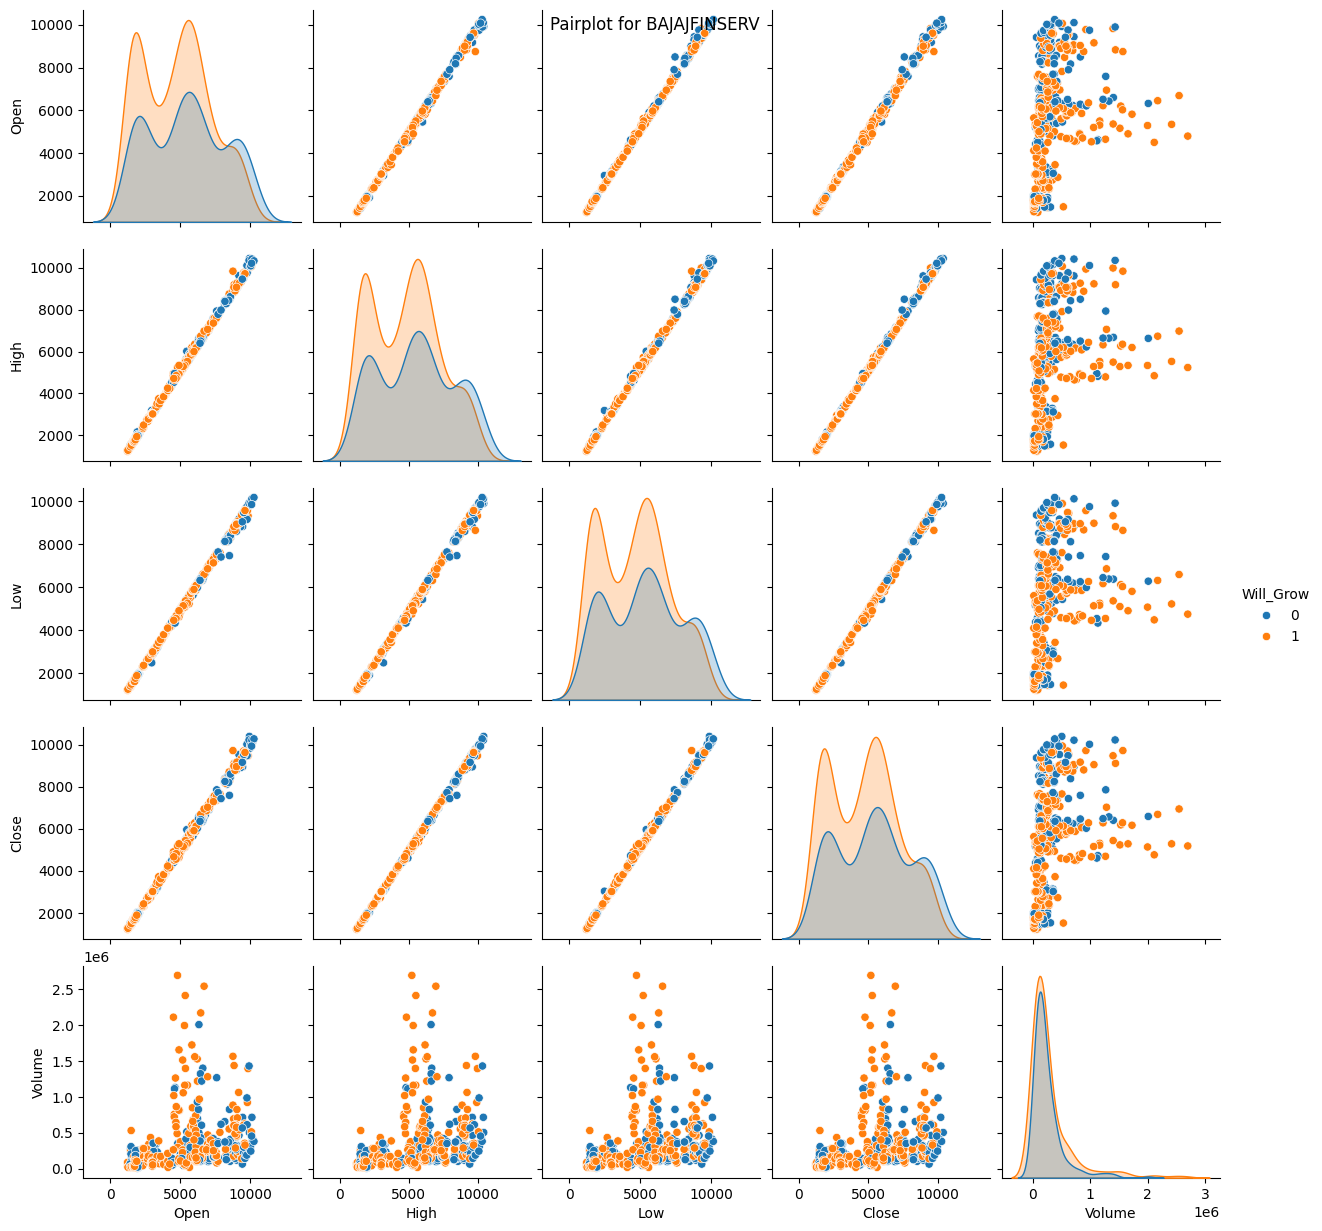

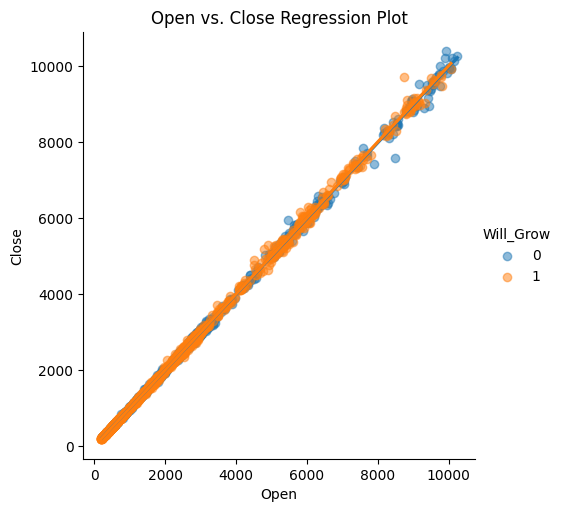

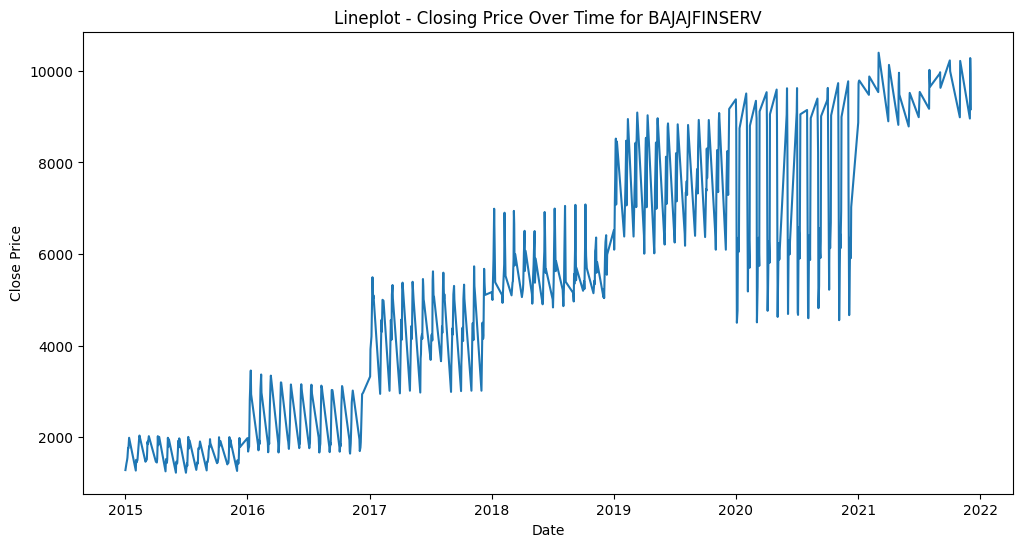

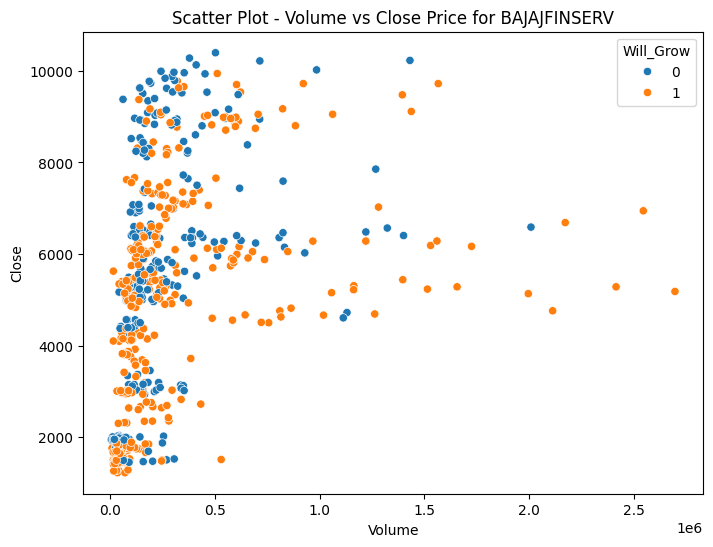

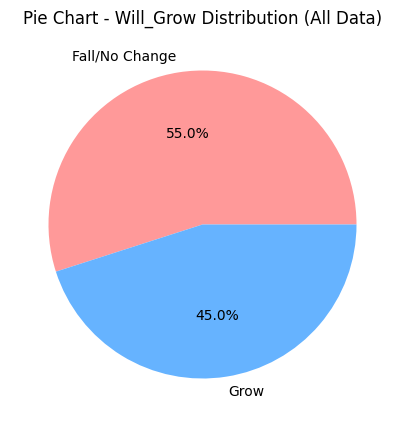

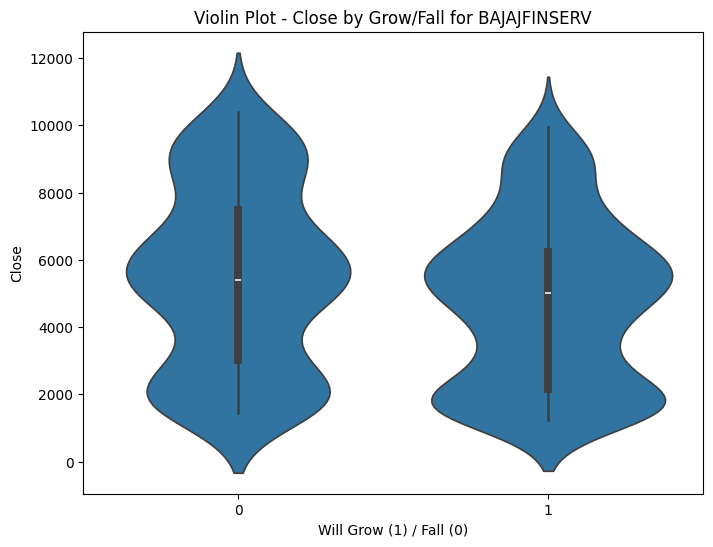

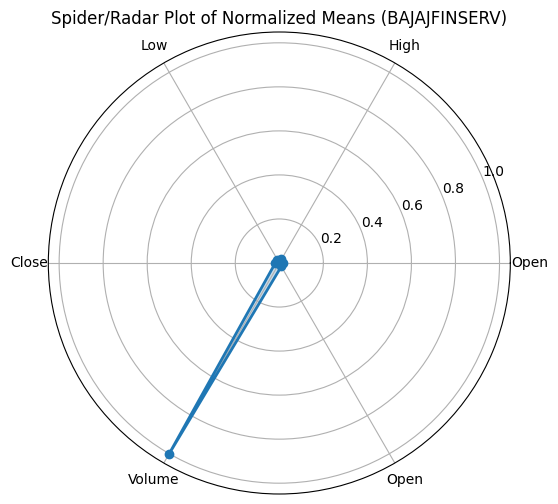

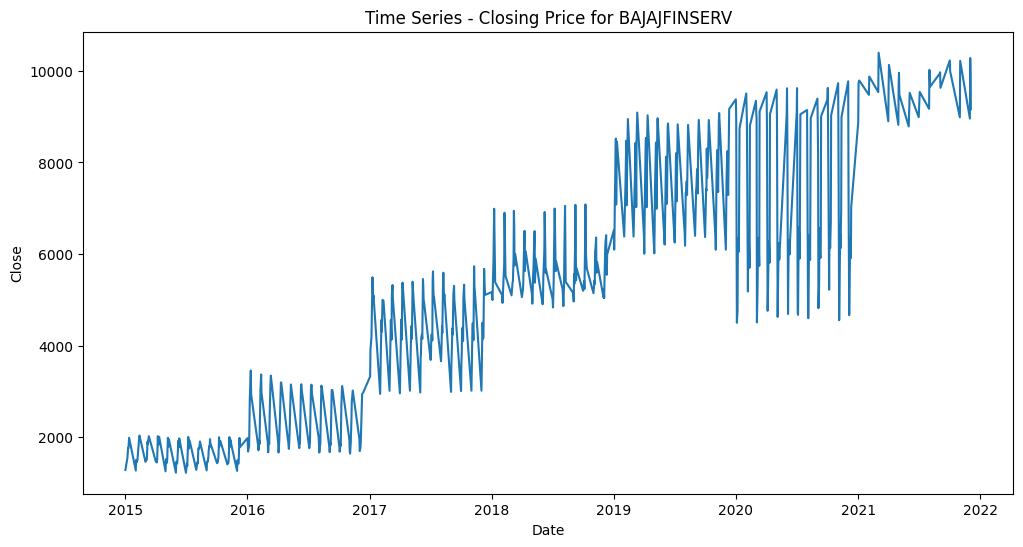

C:\Users\mrran\AppData\Local\Temp\ipykernel_12556\3068685456.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['Daily_Return'] = df_company['Close'].pct_change()
C:\Users\mrran\AppData\Local\Temp\ipykernel_12556\3068685456.py:68: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_company['Daily_Return'].dropna(), shade=True)


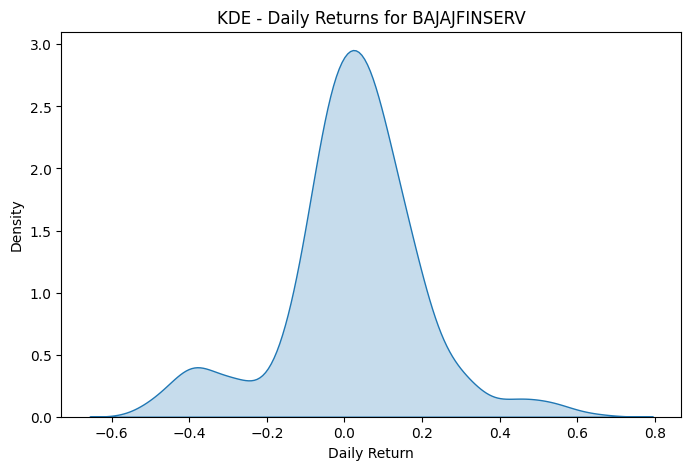

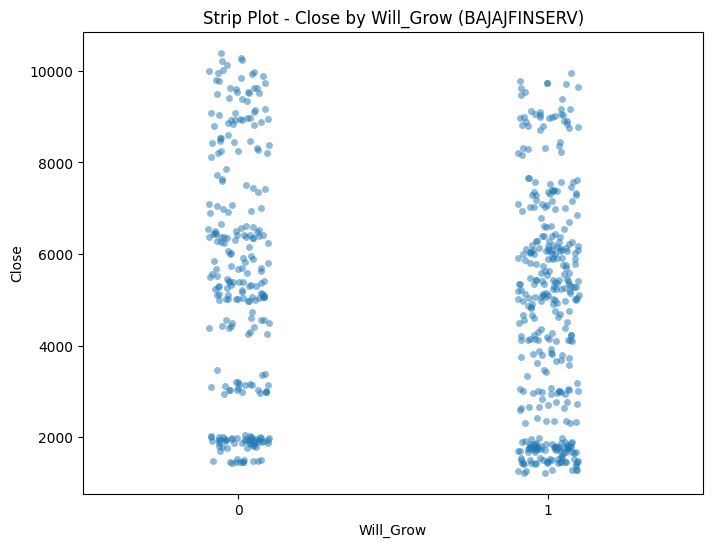

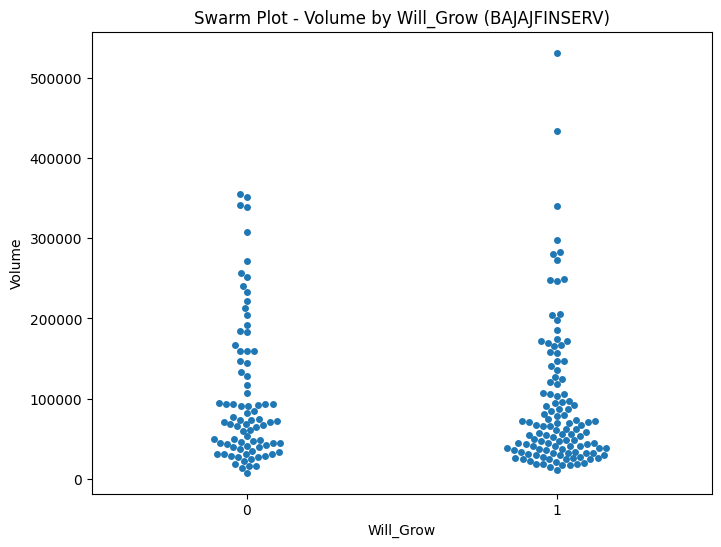

In [32]:
# Pairplot (feature relationships)
sns.pairplot(
    df_company[['Open', 'High', 'Low', 'Close', 'Volume', 'Will_Grow']],
    hue="Will_Grow", diag_kind="kde"
)
plt.suptitle(f"Pairplot for {sample_company}")
plt.show()

# Regression plot (Open vs. Close)
sns.lmplot(data=df, x="Open", y="Close", hue="Will_Grow", scatter_kws={'alpha':0.5})
plt.title("Open vs. Close Regression Plot")
plt.show()

# Line Plot (Closing price over time)
plt.figure(figsize=(12,6))
plt.plot(df_company['Date'], df_company['Close'])
plt.title(f"Lineplot - Closing Price Over Time for {sample_company}")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Scatter Plot (Volume vs Close)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_company, x='Volume', y='Close', hue='Will_Grow')
plt.title(f"Scatter Plot - Volume vs Close Price for {sample_company}")
plt.show()

# Pie Chart (Distribution of Will_Grow)
grow_counts = df['Will_Grow'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(grow_counts, labels=['Fall/No Change', 'Grow'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Pie Chart - Will_Grow Distribution (All Data)")
plt.show()

# Violin Plot (Closing Prices by Target)
plt.figure(figsize=(8,6))
sns.violinplot(x='Will_Grow', y='Close', data=df_company)
plt.title(f"Violin Plot - Close by Grow/Fall for {sample_company}")
plt.xlabel('Will Grow (1) / Fall (0)')
plt.show()

# Spider Plot (Radar chart of means for normalized features)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
mean_values = df_company[features].mean()
values = mean_values / mean_values.max()
labels = list(features)
values = np.append(values.values, values.values[0])  # to close the circle
labels += [labels[0]]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(np.degrees(angles), labels)
plt.title(f"Spider/Radar Plot of Normalized Means ({sample_company})")
plt.show()

# Time Series Plot (Daily Closing Price)
plt.figure(figsize=(12,6))
sns.lineplot(data=df_company, x='Date', y='Close')
plt.title(f"Time Series - Closing Price for {sample_company}")
plt.show()

# KDE Plot (Kernel density of Daily Returns)
df_company['Daily_Return'] = df_company['Close'].pct_change()
plt.figure(figsize=(8,5))
sns.kdeplot(df_company['Daily_Return'].dropna(), shade=True)
plt.title(f"KDE - Daily Returns for {sample_company}")
plt.xlabel('Daily Return')
plt.show()

# 10. Strip Plot (Close price vs Will_Grow)
plt.figure(figsize=(8,6))
sns.stripplot(x='Will_Grow', y='Close', data=df_company, jitter=True, alpha=0.5)
plt.title(f"Strip Plot - Close by Will_Grow ({sample_company})")
plt.show()

# 11. Swarm Plot (Volume vs Will_Grow)
plt.figure(figsize=(8,6))
sns.swarmplot(x='Will_Grow', y='Volume', data=df_company[:200])  # Swarm plot gets slow on big data
plt.title(f"Swarm Plot - Volume by Will_Grow ({sample_company})")
plt.show()



ALL COMPANIES COUNTER PLOT FOR 'WILL GROW'

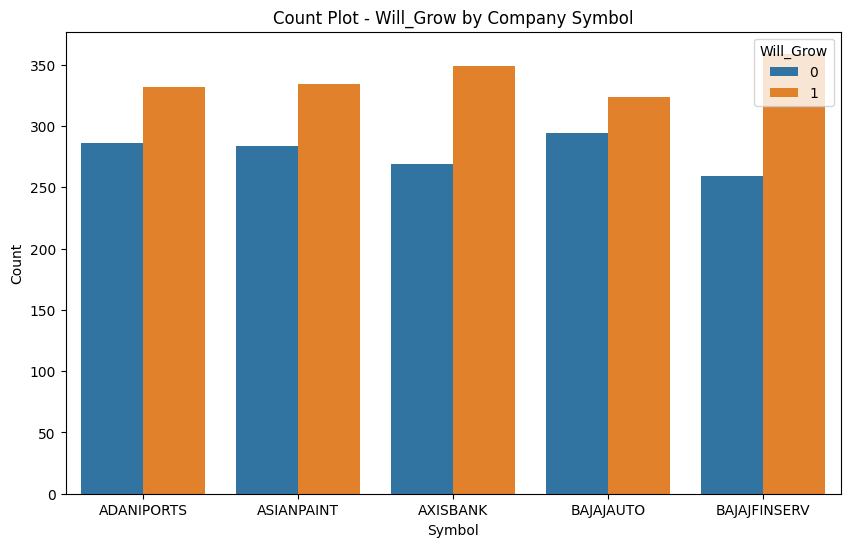

In [33]:
# 12. Count Plot (All Data - Will_Grow by Symbol)
plt.figure(figsize=(10,6))
sns.countplot(x='Symbol', hue='Will_Grow', data=df)
plt.title("Count Plot - Will_Grow by Company Symbol")
plt.ylabel("Count")
plt.show()